收集数据
---------
twitter-archive-enhanced项目中已经给出

此处需要从URL中收集image_predictions数据

In [3]:
import requests
import os
folder_name = 'WeRateDogs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
response
with open(os.path.join(folder_name,'image_predictions.tsv'),'wb') as file:
   file.write(response.content)

In [4]:
import json
import pandas as pd
tweet_list = []
with open("tweet_json.txt","r") as f:
  for row in f:  
      json_dict = json.loads(row)
      to_append={
'tweet_id':json_dict['id'],
'retweet_count':json_dict['retweet_count'],
'favorite_count':json_dict['favorite_count'],
'in_reply_to_status_id':json_dict['in_reply_to_status_id'],
'in_reply_to_user_id':json_dict['in_reply_to_user_id'],
}
      tweet_list.append(to_append)
tweet_extra=pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count','in_reply_to_status_id','in_reply_to_user_id'])

此处image_predictions,tweet_json,twitter-archive-enhanced三个数据集都已收集完毕,而自重tewwt_json选择需要的数据形成tweet_extra数据框

评估数据
-----------

### 目测评估

* 将三个数据导入

In [28]:
import pandas as pd
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t',engine='python')
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv',engine='python')
tweet_json = pd.read_table('tweet_json.txt',engine='python')

In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [5]:
twitter_archive_enhanced 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [28]:
tweet_extra

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id
0,892420643555336193,8842,39492,NaN,NaN
1,892177421306343426,6480,33786,NaN,NaN
2,891815181378084864,4301,25445,NaN,NaN
3,891689557279858688,8925,42863,NaN,NaN
4,891327558926688256,9721,41016,NaN,NaN
5,891087950875897856,3240,20548,NaN,NaN
6,890971913173991426,2142,12053,NaN,NaN
7,890729181411237888,19548,66596,NaN,NaN
8,890609185150312448,4403,28187,NaN,NaN
9,890240255349198849,7684,32467,NaN,NaN


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
twitter_archive_enhanced.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [17]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_extra.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [21]:
tweet_json1 = tweet_extra.to_csv("tweet_json.csv")

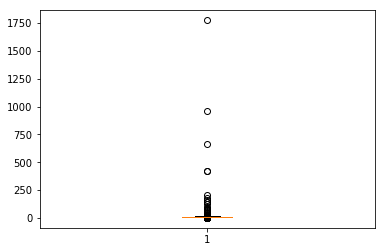

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(twitter_archive_enhanced['rating_numerator'])
plt.show()

#### 质量问题
##### image_predictions
##### tweet_json
##### twitter_archive_enhanced
* in_reply_to_status_id这两列出现很多空值，需要对空值进行处理
* in_reply_to_user_id这两列出现很多空值，需要对空值进行处理
* retweeted_status_id列有空值
* retweeted_status_user_id列有空值
* retweeted_status_timestamp列有空值
* doggo，floofer，pupper，puppo四列值为None
* name列有空值和异常值
* expanded_urls有空值
* rating_numerator的最大值是1776，明显高于75%的值，疑似异常值
* rating_numerator中有非数字形式的值

#### 整洁度问题
##### image_predictions
##### tweet_json
##### twitter_archive_enhanced
* timestamp列中时间和日期在同一列
* doggo，floofer，pupper，puppo为变量内容作为列名

数据清理
--------

#### 复制三个数据的副本

In [29]:
image_predictions_clean = image_predictions.copy()
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
tweet_extra_clean = tweet_extra.copy()

* 第1-5个质量问题，从tweet_json中提取发现这部数据本身就不完整，而且对于分析目的没有作用，所以选择删除这5列数据

In [30]:
del twitter_archive_enhanced_clean['in_reply_to_status_id']
del twitter_archive_enhanced_clean['in_reply_to_user_id']
del twitter_archive_enhanced_clean['retweeted_status_id']
del twitter_archive_enhanced_clean['retweeted_status_user_id']
del twitter_archive_enhanced_clean['retweeted_status_timestamp']

In [33]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [31]:
import json
tweet_list = []
with open("tweet_json.txt","r") as f:
  for row in f:  
      json_dict = json.loads(row)
      to_append={
'tweet_id':json_dict['id'],
'retweet_count':json_dict['retweet_count'],
'favorite_count':json_dict['favorite_count']
      }
      tweet_list.append(to_append)
tweet_extra=pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count'])
tweet_extra_clean = tweet_extra.copy()

* 第六个质量问题 doggo，floofer，pupper，puppo有空值，对内容进行提取
* 第二个整洁度问题 doggo，floofer，pupper，puppo变量内容作为列名

In [32]:
twitter_archive_enhanced_clean['dog_status'] = 'none'
dog_lists = ['doggo','floofer','pupper','puppo']
for i in range(1,len(twitter_archive_enhanced_clean)):
    text = twitter_archive_enhanced_clean['text'][i]
    for l in dog_lists:
        if l in text:
            twitter_archive_enhanced_clean['dog_status'][i] = l
del twitter_archive_enhanced_clean['doggo']
del twitter_archive_enhanced_clean['floofer']
del twitter_archive_enhanced_clean['pupper']
del twitter_archive_enhanced_clean['puppo']  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


* 第七个质量问题，name列有a,an ,等值，鉴于a和an都是非名字，统一替换为None

In [33]:
twitter_archive_enhanced_clean['name']=twitter_archive_enhanced_clean['name'].replace('a','None')
twitter_archive_enhanced_clean['name']=twitter_archive_enhanced_clean['name'].replace('an','None')
twitter_archive_enhanced_clean['name']=twitter_archive_enhanced_clean['name'].replace('the','None')
twitter_archive_enhanced_clean['name'].value_counts()

None         815
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
Rusty          6
Milo           6
Jax            6
Scout          6
Stanley        6
Bella          6
Dave           6
Oscar          6
Leo            6
Koda           6
Jack           6
Alfie          5
Chester        5
Phil           5
Oakley         5
            ... 
Geno           1
Jim            1
Tycho          1
Vinnie         1
Bonaparte      1
Furzey         1
Ester          1
Creg           1
Mary           1
Nugget         1
Jennifur       1
Fillup         1
Rose           1
Dudley         1
Gin            1
Ambrose        1
Shadoe         1
Geoff          1
Peanut         1
Amy            1
Barney         1
Dotsy          1
Darby          1
Willow         1
Aldrick        1
Skittles       1
Timofy         1
Pilot         

* 第八个质量问题 expanded_url有空值，此列对分析作用不大，删除

In [34]:
del twitter_archive_enhanced_clean['expanded_urls']

* 第二个整洁度问题 timestamp列有时间和日期两种形式的数据

In [35]:
twitter_archive_enhanced_clean['date'] = twitter_archive_enhanced_clean['timestamp'].str.slice(0,10)
twitter_archive_enhanced_clean['time'] = twitter_archive_enhanced_clean['timestamp'].str.slice(11,19)
del twitter_archive_enhanced_clean['timestamp']

* 第九个质量问题 rating_numerator的最大值是1776，明显高于75%的值，疑似异常值，删除排名后三行

In [36]:
twitter_archive_enhanced_clean['rating_numerator'].sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, dtype: int64

In [37]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_numerator']<=420]

In [38]:
twitter_archive_enhanced_clean['rating_numerator'].sort_values()

315       0
1016      0
2091      1
605       1
1869      1
1940      1
1446      1
2335      1
2338      1
2261      1
2038      1
1764      2
2349      2
2326      2
2237      2
2079      2
1920      2
1761      2
2246      2
2310      2
2239      3
1836      3
1189      3
2305      3
1406      3
1898      3
2202      3
2136      3
1692      3
1478      3
       ... 
64       14
369      14
56       14
788      14
631      14
291      15
285      15
55       17
1663     20
516      24
1712     26
763      27
1433     44
1274     45
1202     50
1351     60
695      75
340      75
1254     80
433      84
1843     88
1228     99
1635    121
1634    143
1779    144
902     165
290     182
1120    204
188     420
2074    420
Name: rating_numerator, dtype: int64

* 合并并导出整理好的数据

In [39]:
merge1 = pd.merge(image_predictions_clean,twitter_archive_enhanced_clean,how='inner',left_on='tweet_id',right_on='tweet_id')
twitter_archive_master = pd.merge(merge1,tweet_extra,how='inner',left_on='tweet_id',right_on='tweet_id')
twitter_archive_master.to_csv('twitter_archive_master.csv')

三个分析过程
--------

### 第一个分析过程 ：不同的dog_status的favorite_count水平

In [43]:
import pandas as pd
twitter_archive_master = pd.read_csv('twitter_archive_master.csv',engine='python')
import numpy
twitter_archive_master.groupby(by=['dog_status'])['favorite_count'].agg({'favorite_counts':numpy.sum,'counts':numpy.size,'mean_favorite':numpy.mean})

,favorite_counts,counts,mean_favorite
dog_status,,,
doggo,1116454,68,16418.441176
floofer,68550,3,22850.000000
none,14316477,1734,8256.330450
pupper,1650658,238,6935.537815
puppo,634995,29,21896.379310


* 对分母全部转化为10之后，对rating进行分组，查看各组的喜爱水平

In [44]:
twitter_archive_master['scale']twitter_archive_master['scale'] = twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator*10
twitter_archive_master['scale'].value_counts()

12.000000     478
10.000000     431
11.000000     419
13.000000     282
9.000000      151
8.000000       95
7.000000       51
14.000000      40
5.000000       35
6.000000       32
3.000000       19
4.000000       15
2.000000       10
1.000000        4
0.000000        2
6.363636        1
26.000000       1
27.000000       1
15.000000       1
8.181818        1
420.000000      1
34.285714       1
75.000000       1
Name: scale, dtype: int64

* 根据结果将评分分为3组，10分以下（不含10分），10-20分（含10分，不含20分），20分以上（含20分）

In [46]:
bins = [min(twitter_archive_master.scale)-1,10,20,max(twitter_archive_master.scale)+1]
lables = ['10级以下','10到20级','20级以上']
twitter_archive_master['rating_cut'] = pd.cut(twitter_archive_master['scale'],bins,labels=lables)
twitter_archive_master.groupby(by=['rating_cut'])['favorite_count'].agg({'favorite_counts':numpy.sum,'counts':numpy.size,'mean_favorite':numpy.mean})

,favorite_counts,counts,mean_favorite
rating_cut,,,
10级以下,2936256,847,3466.654073
10到20级,14789920,1220,12122.885246
20级以上,60958,5,12191.600000


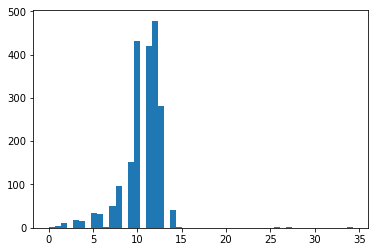

In [56]:
plt.hist(twitter_archive_master['scale'][twitter_archive_master['scale']<75], 50)
plt.show()

* 第三个分析，不同的图片预估算法的准确程度对比

In [58]:
p1 = twitter_archive_master[twitter_archive_master.p1_conf>=0.95]
p2 = twitter_archive_master[twitter_archive_master.p2_conf>=0.95]
p3 = twitter_archive_master[twitter_archive_master.p3_conf>=0.95]
pp1=len(p1)/len(twitter_archive_master)
pp2=len(p2)/len(twitter_archive_master)
pp3=len(p3)/len(twitter_archive_master)
pp1

0.12837837837837837

In [59]:
pp2

0.0

In [60]:
pp3

0.0

* 一个可视化过程 不同时间转发量retweet_count的趋势图

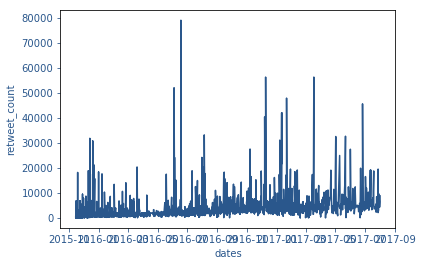

In [67]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
twitter_archive_master['dates'] = pd.to_datetime(twitter_archive_master['date'])
mainColor = (42/256, 87/256, 141/256, 1)
font = {'size':500,'family':"SimHei"}
plt.xlabel('dates',color=mainColor)
plt.ylabel('retweet_count',color=mainColor)
plt.tick_params(axis='x',colors=mainColor)
plt.tick_params(axis='y',colors=mainColor)
plt.plot(twitter_archive_master['dates'],twitter_archive_master['retweet_count'],'-',color=mainColor)
plt.show()